In [1]:
from transformers import pipeline

In [2]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


# Zero-shot classification 
We need to classify texts that have not been labeled. 

Transformers can be grouped into threee categories: 
1. GPT-like (also called auto-regressive Transformer models)
2. BERT-like (also called auto-encoding Transformer models)
3. BART/T5  (also called sequence-to-sequence Transformer models)

All the Transformer models have been trained as langugage models. This means they have been trained on large amount of raw text in a self-supervsied fashon. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means humans are not needed to label the data. 

Causal Language modeling: 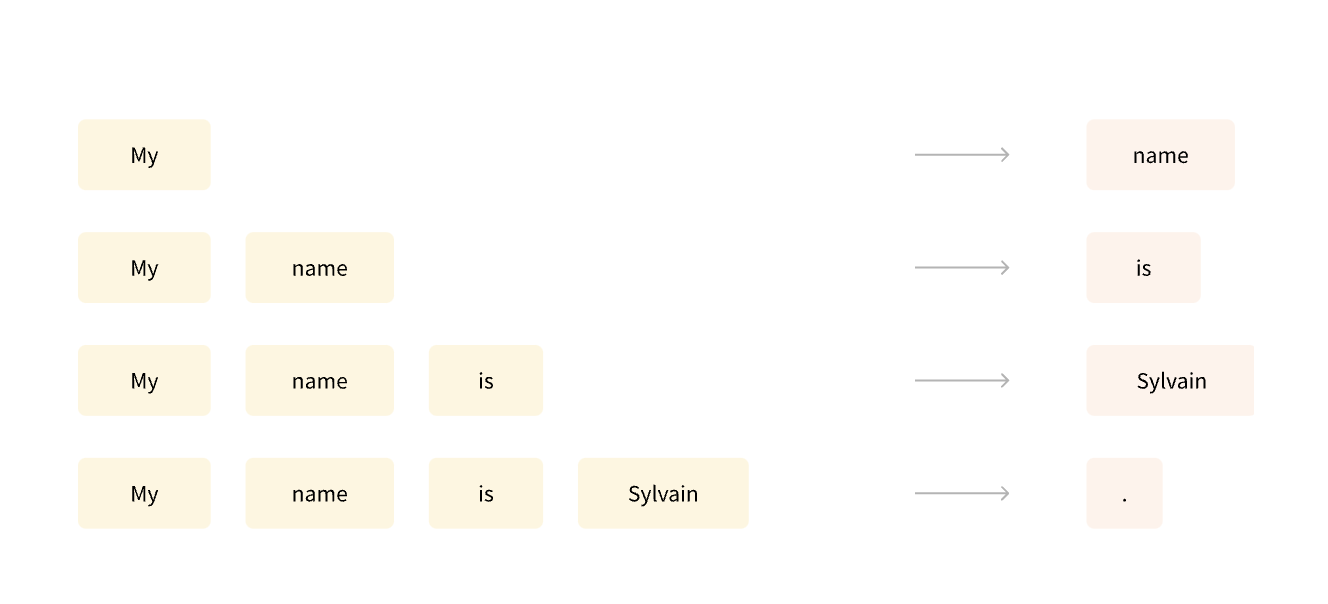


Masked language modeling: 
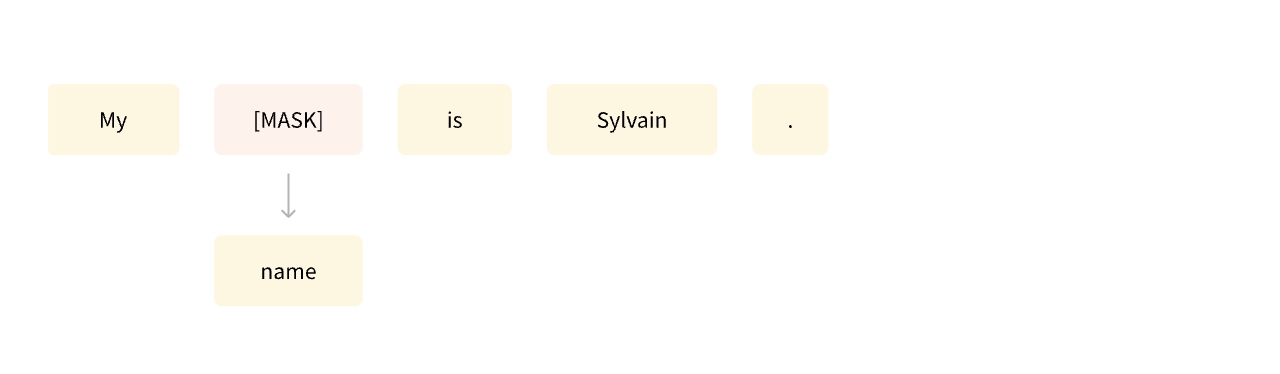


Pretaining is the act of training  a model from scrach: the weights are randomly initialized, and the training starts without any prior knowledge. 


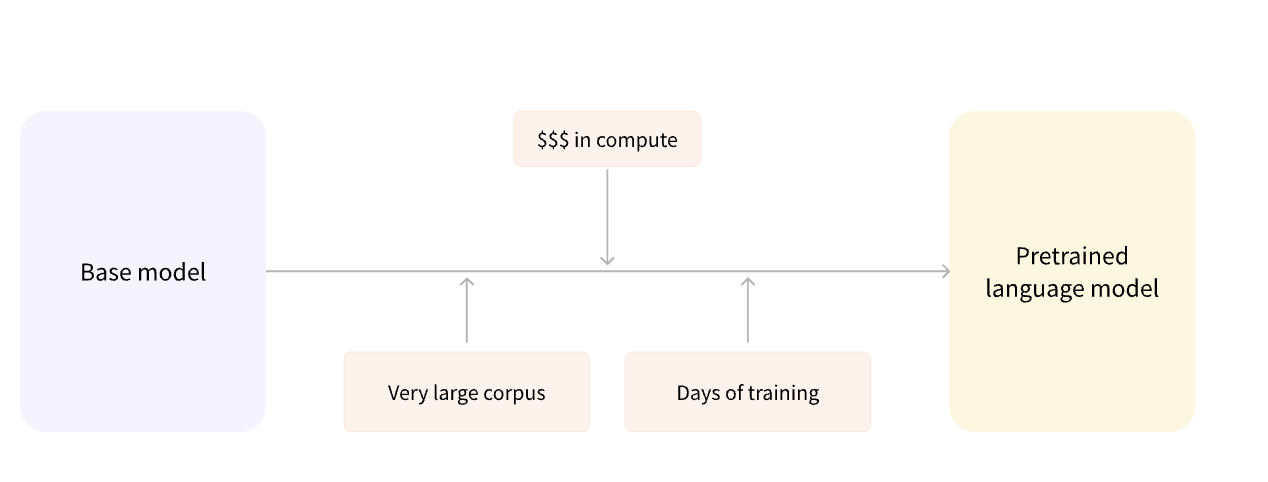

This pre-training is usually done on a very large amounts of data. Therefore, it requires a very large corpus of data, and training can take several weeks.

Fine-tuning on the other hand, is the training done after a model has been pretrained. To perform fine-tuining, you first acquire a  pretrained language model, then perform additionl training with the dataset specific to your task. 
 - the pretrained model that has some similarities wih the fine-tuning dataset. The fine-tuning process is thus able to take advantage of the knowledge acquired by the initial model during pre-training.

Fine tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constrained than full pretraining.

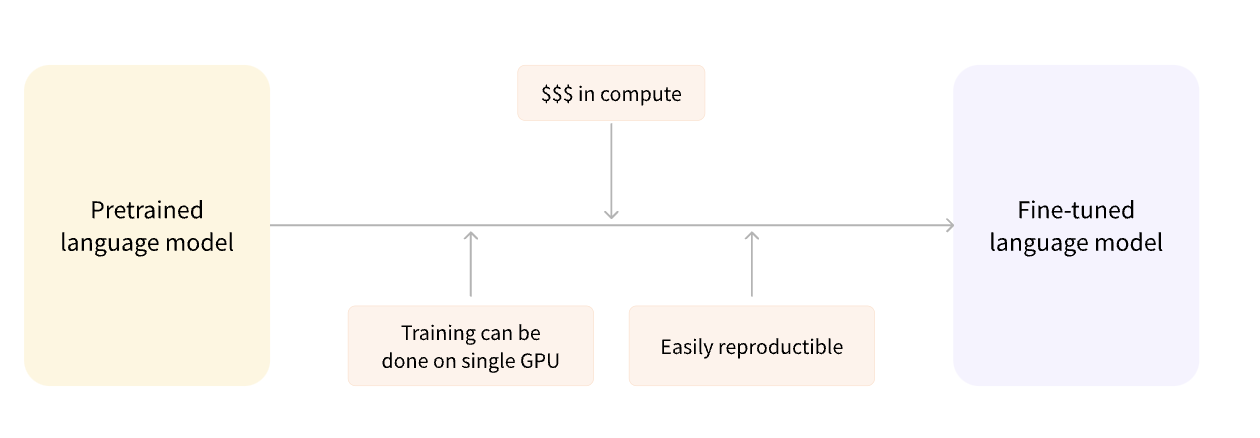


##  General Architecture

The model is primarily composed of two blocks:
 - Encoder: the encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input
 - Decoder: the decoder uses the encoder's representation (features) along with other inputs to generate a target sequence.  This means the model is optimized for generating outputs.
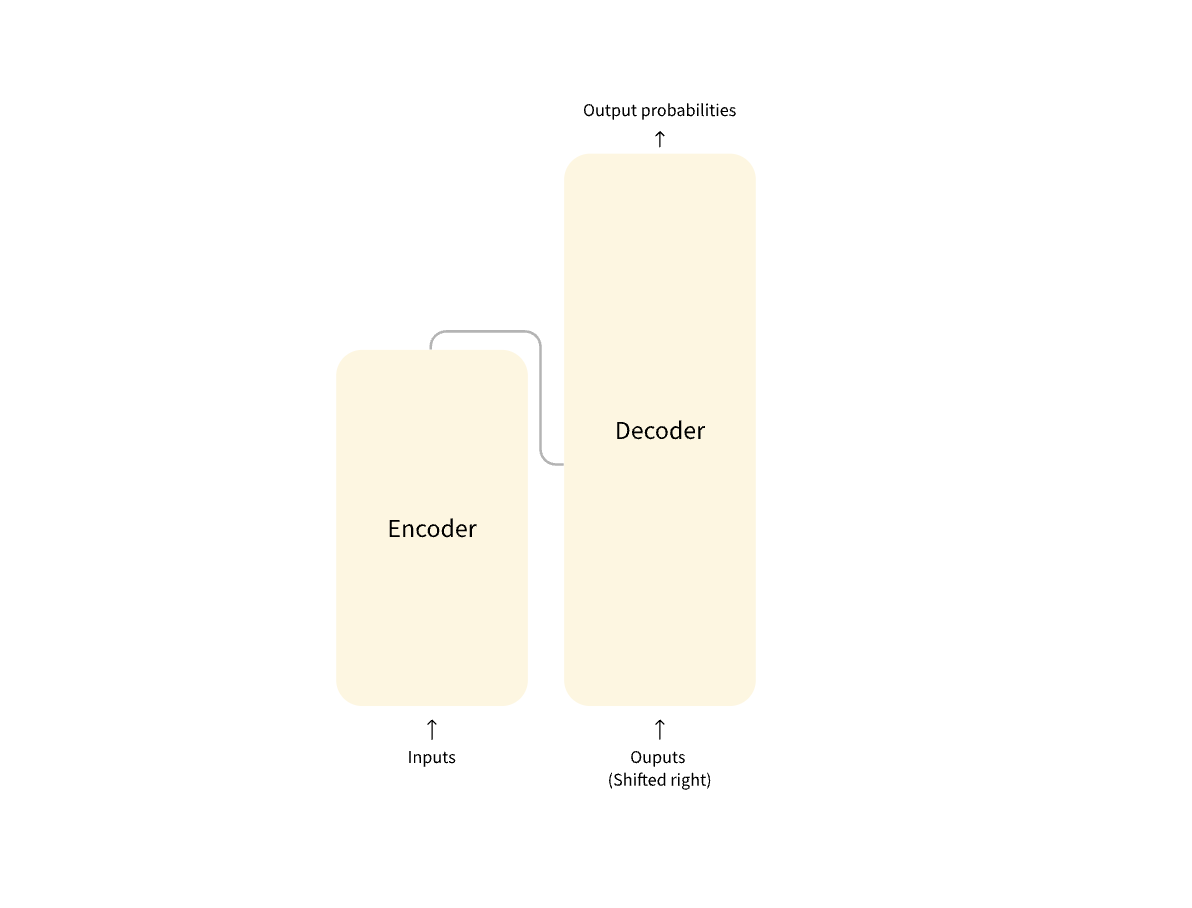

Each of these parts can be used independently, depending on the task:
 - Encoder-only models: Good for task that require understanding of the input, such as sentence classification and named entity recognition.
 - Decoder-only models: good for generative tasks such as text generation.
 - Encoder-decoder models or sequence-to-sequence models: good for generative taks that require an input, such as translation or summarization


## the original architecture:
the Transformer architecture was originally designed translation. During training,  the encoder receives input (sentences) in a certian language, while the decoder receives the same sentence in the desired target language

In the encoder, the attention layer can use all the words in a sentence (since the translation of a given word can be dependent on what is after as well as before in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated. For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word. 

### Encoder Models
- at each stage, the attention layer can access all the words in the initial sentence
- characterized as having bi-directional attention, often called auto-encoding models
- pretraining usually revolves around masking random words and tasking the model with finding or reconstructing the initial sentence
- Encoder models are best suited for tasks requiring an understanding of full sentence, such as sentence classification, named entity recognition (and more genenerally word classification), and extractive question answering

### Decoder models
- at each stage, for a given word the attention layers can only access the words before it in the sentence.
- often called auto-regressive models
- pre-training revolves around predicting the next word in a sentence


### Encoder-decoder models 
- also called sequence-to-sequence use both parts of the transformer architecture
- at each stage, the attention layer of encoder can access all of the words in the initial sentence, whereas the attention layer of the decoder can only access the words positioned before a given sequence,
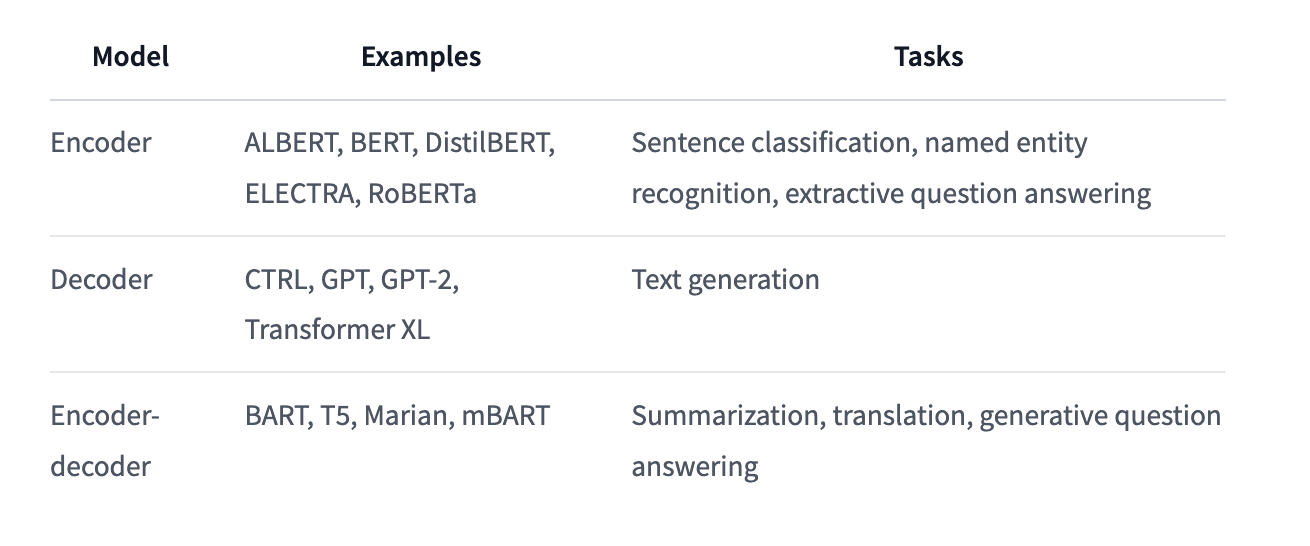


# Quesitons:

What does "transfer learning" mean? 
- transferring the knowledge of a pretrained model to a new model by initializing the second model with the first model's weight


True or false? A language model usually does not need labels for its pretraining.
- The pretraining is usually self-supervised, which means the labels are created automatically from the inputs (like predicting the next word or filling in some masked words).


What possible source can the bias observed in a model have?
- When applying Transfer Learning, the bias in the pretrained model used persists in the fine-tuned model.
- The data the model was trained on is biased.
- The metric the model was optimizing for is biased. A less obvious source of bias is the way the model is trained. Your model will blindly optimize for whatever metric you chose, without any second thoughts.



In [3]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
